In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from imutils import paths
import numpy as np
import argparse
import cv2
import os

#For colab cv2 imshow
from google.colab.patches import cv2_imshow

In [0]:
def dhash(image, hashSize=8):
	# convert the image to grayscale and resize the grayscale image,
	# adding a single column (width) so we can compute the horizontal
	# gradient
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	resized = cv2.resize(gray, (hashSize + 1, hashSize))

	# compute the (relative) horizontal gradient between adjacent
	# column pixels
	diff = resized[:, 1:] > resized[:, :-1]

	# convert the difference image to a hash and return it
	return sum([2 ** i for (i, v) in enumerate(diff.flatten()) if v])

In [62]:
file_path='/content/drive/My Drive/ImageDuplication/dataset'

print("[INFO] computing image hashes...")
imagePaths = list(paths.list_images(file_path))
print(len(imagePaths))

[INFO] computing image hashes...
1003


In [0]:
hashes = {}

# loop over our image paths
for imagePath in imagePaths:
	# load the input image and compute the hash
	image = cv2.imread(imagePath)
	h = dhash(image)

	# grab all image paths with that hash, add the current image
	# path to it, and store the list back in the hashes dictionary
	p = hashes.get(h, [])
	p.append(imagePath)
	hashes[h] = p

15443501585133582635 ['/content/drive/My Drive/ImageDuplication/dataset/00000738.jpg', '/content/drive/My Drive/ImageDuplication/dataset/00000026.jpg', '/content/drive/My Drive/ImageDuplication/dataset/00000355.jpg', '/content/drive/My Drive/ImageDuplication/dataset/00000104.jpg']
[INFO] hash: 15443501585133582635


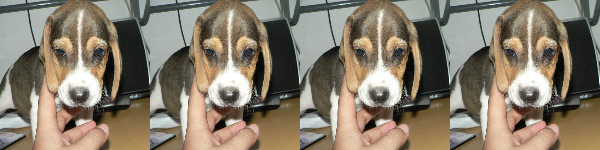

13344784005636363614 ['/content/drive/My Drive/ImageDuplication/dataset/00000494.jpg', '/content/drive/My Drive/ImageDuplication/dataset/00000971.jpg', '/content/drive/My Drive/ImageDuplication/dataset/00000062.jpg']
[INFO] hash: 13344784005636363614


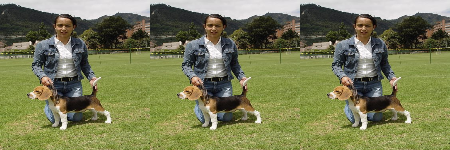

7054210665732718398 ['/content/drive/My Drive/ImageDuplication/dataset/00000869.jpg', '/content/drive/My Drive/ImageDuplication/dataset/00000071.jpg', '/content/drive/My Drive/ImageDuplication/dataset/00000005.jpg']
[INFO] hash: 7054210665732718398


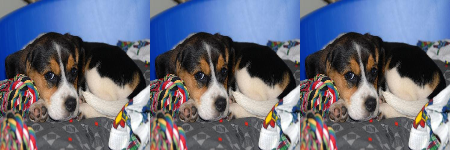

11461311613926139920 ['/content/drive/My Drive/ImageDuplication/dataset/IMG-1627.JPG', '/content/drive/My Drive/ImageDuplication/dataset/IMG-1627-min.JPG']
[INFO] hash: 11461311613926139920


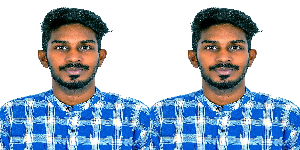

In [64]:
for (h, hashedPaths) in hashes.items():
    # check to see if there is more than one image with the same hash
    if len(hashedPaths) > 1:
        print(h, hashedPaths)

        # initialize a montage to store all images with the same hash
        montage = None

        # loop over all image paths with the same hash
        for p in hashedPaths:
            # load the input image and resize it to a fixed width and height
            image = cv2.imread(p)
            image = cv2.resize(image, (150, 150))
                # if our montage is None, initialize it
            if montage is None:
                montage = image
            else:
                # otherwise, horizontally stack the images
                montage = np.hstack([montage, image])

        # show the montage for the hash
        print('[INFO] hash: {}'.format(h))
        cv2_imshow(montage)
        # cv2.waitKey(1)		